<a href="https://colab.research.google.com/github/ss010101/IITRPRAI_24082382/blob/main/UnsupervisedMLAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create a synthetic dataset, apply two different unsupervised learning algorithms (K-Means and another), visualize the results of each, and compare them to demonstrate how unsupervised learning works.

## Create a dataset

### Subtask:
Generate a synthetic dataset suitable for unsupervised learning, such as one with distinct clusters.


**Reasoning**:
Generate a synthetic dataset with distinct clusters using make_blobs.



In [1]:
from sklearn.datasets import make_blobs
import pandas as pd

X, y = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['true_label'] = y
display(df.head())

,feature1,feature2,true_label
0,-9.297689,6.473679,3
1,-9.698741,6.938967,3
2,-1.686653,7.793442,0
3,-7.097308,-5.781333,2
4,-10.876452,6.315437,3


## Apply k-means clustering

### Subtask:
Implement the K-Means algorithm to cluster the generated data.


**Reasoning**:
Implement the K-Means algorithm to cluster the generated data by importing KMeans, instantiating the model, fitting it to the data, and adding the predicted labels to the DataFrame.



In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # n_init to suppress warning
kmeans.fit(df[['feature1', 'feature2']])
df['kmeans_label'] = kmeans.labels_
display(df.head())

,feature1,feature2,true_label,kmeans_label
0,-9.297689,6.473679,3,3
1,-9.698741,6.938967,3,3
2,-1.686653,7.793442,0,0
3,-7.097308,-5.781333,2,1
4,-10.876452,6.315437,3,3


## Visualize the results

### Subtask:
Plot the data points, colored by their assigned clusters, to visualize the clustering results.


**Reasoning**:
The subtask is to visualize the clustering results. I will create a scatter plot of the data points, colored by their assigned K-Means clusters, using the `feature1` and `feature2` columns from the dataframe.



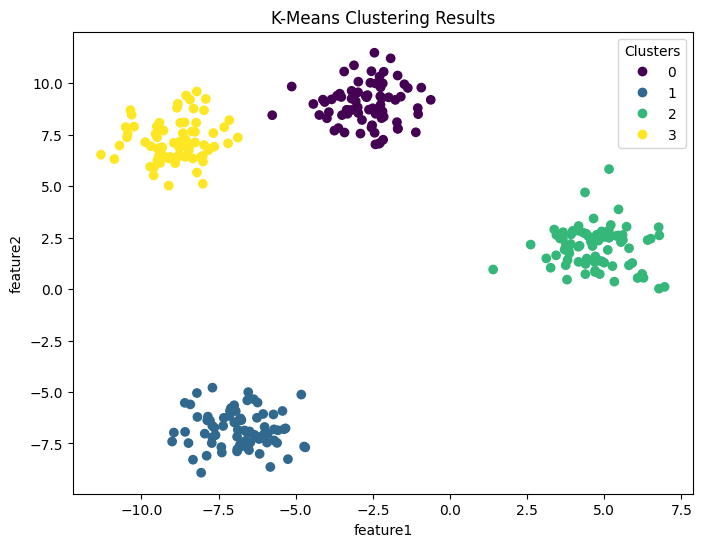

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['feature1'], df['feature2'], c=df['kmeans_label'], cmap='viridis')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('K-Means Clustering Results')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

## Apply another unsupervised learning algorithm

### Subtask:
Use a different unsupervised learning algorithm, such as DBSCAN or Gaussian Mixture Models, to cluster the data and compare the results.


**Reasoning**:
Import the DBSCAN class, instantiate it, fit it to the data, and add the labels to the dataframe.



In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df[['feature1', 'feature2']])
df['dbscan_label'] = dbscan.labels_
display(df.head())

,feature1,feature2,true_label,kmeans_label,dbscan_label
0,-9.297689,6.473679,3,3,0
1,-9.698741,6.938967,3,3,0
2,-1.686653,7.793442,0,0,-1
3,-7.097308,-5.781333,2,1,1
4,-10.876452,6.315437,3,3,-1


## Visualize and compare results

### Subtask:
Visualize the results of the second algorithm and compare them to the K-Means results.


**Reasoning**:
Create a figure with two subplots and plot the K-Means and DBSCAN clustering results side-by-side with appropriate labels, titles, and legends.



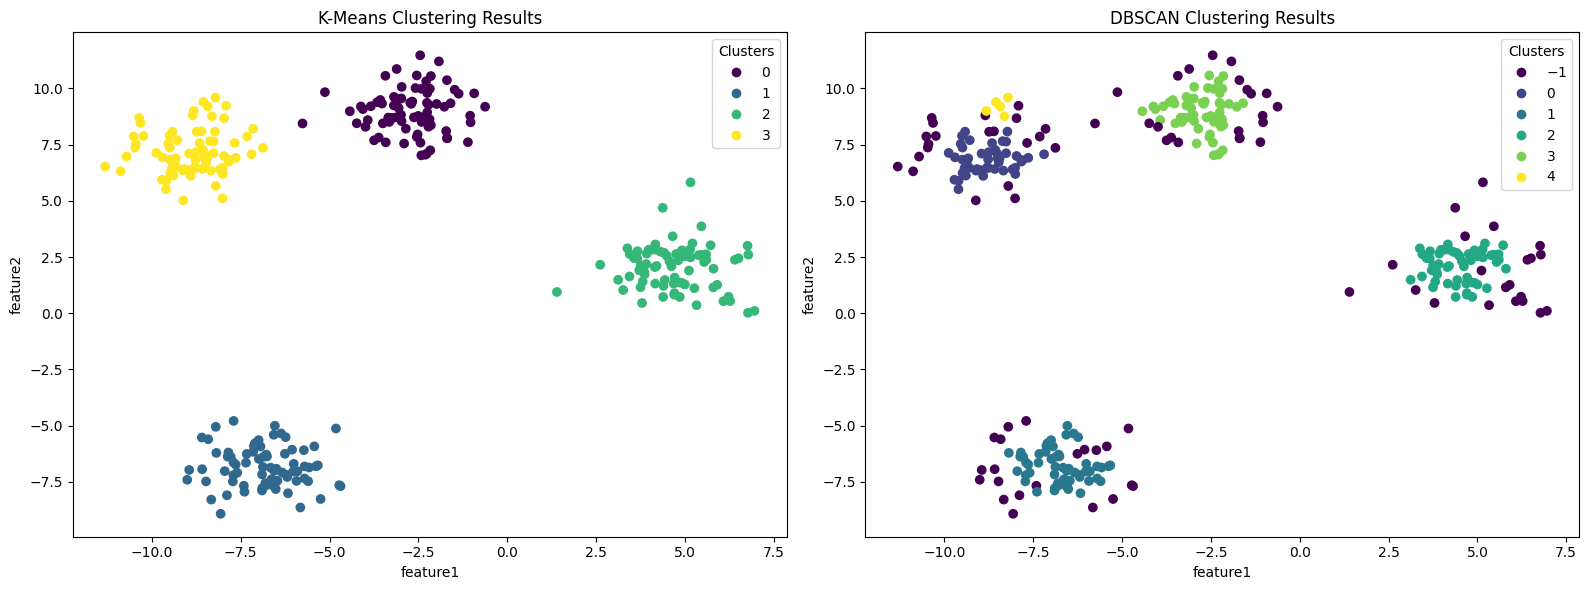

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means subplot
scatter_kmeans = axes[0].scatter(df['feature1'], df['feature2'], c=df['kmeans_label'], cmap='viridis')
axes[0].set_xlabel('feature1')
axes[0].set_ylabel('feature2')
axes[0].set_title('K-Means Clustering Results')
axes[0].legend(*scatter_kmeans.legend_elements(), title='Clusters')

# DBSCAN subplot
scatter_dbscan = axes[1].scatter(df['feature1'], df['feature2'], c=df['dbscan_label'], cmap='viridis')
axes[1].set_xlabel('feature1')
axes[1].set_ylabel('feature2')
axes[1].set_title('DBSCAN Clustering Results')
axes[1].legend(*scatter_dbscan.legend_elements(), title='Clusters')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   A synthetic dataset with 300 samples, 2 features, and 4 distinct clusters was successfully generated.
*   K-Means clustering with 4 clusters was applied to the dataset, and the resulting cluster labels were added to the DataFrame.
*   DBSCAN clustering was applied to the dataset, and the resulting cluster labels, including noise points labeled as -1, were added to the DataFrame.
*   Visualizations of both K-Means and DBSCAN clustering results were generated, showing how each algorithm grouped the data points. K-Means formed roughly spherical clusters, while DBSCAN identified density-based clusters and noise.

### Insights or Next Steps

*   The comparison highlights the difference between distance-based clustering (K-Means) and density-based clustering (DBSCAN), demonstrating how the choice of algorithm impacts the clustering outcome.
*   Further analysis could involve comparing the clustering results against the true labels using metrics like Adjusted Rand Index or Silhouette Score to quantitatively evaluate the performance of each algorithm on this dataset.


## Apply Principal Component Analysis (PCA)

### Subtask:
Apply PCA to the dataset for dimensionality reduction.

**Reasoning**:
Import the `PCA` class from `sklearn.decomposition`, instantiate it with 2 components (since we have 2 features), fit it to the `feature1` and `feature2` columns of the dataframe, and transform the data. Then, create a new DataFrame with the principal components and display the head of the new DataFrame.

In [6]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming df is already loaded and contains 'feature1' and 'feature2'
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['feature1', 'feature2']])

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

display(pca_df.head())

,principal_component_1,principal_component_2
0,2.578920,-6.422740
1,2.969652,-6.896729
2,5.167302,0.855305
3,-9.127173,-2.180764
4,2.155863,-7.951974


## Visualize PCA Results

### Subtask:
Visualize the data points in the principal component space.

**Reasoning**:
Create a scatter plot of the data points using the `principal_component_1` and `principal_component_2` columns from the `pca_df` DataFrame. Color the points based on the original `true_label` to see if the clusters are still visible after PCA.

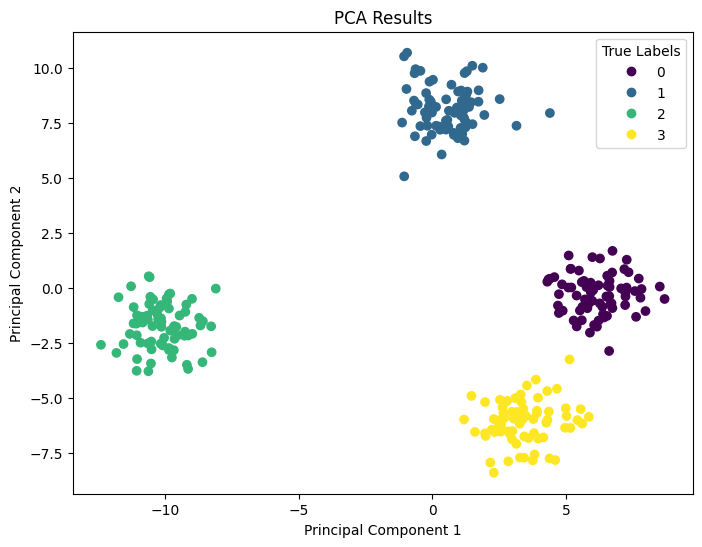

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'], c=df['true_label'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.legend(*scatter.legend_elements(), title='True Labels')
plt.show()

## Summary:

### Data Analysis Key Findings

*   A synthetic dataset with 300 samples, 2 features, and 4 distinct clusters was successfully generated.
*   K-Means clustering with 4 clusters was applied to the dataset, and the resulting cluster labels were added to the DataFrame.
*   DBSCAN clustering was applied to the dataset, and the resulting cluster labels, including noise points labeled as -1, were added to the DataFrame.
*   Visualizations of both K-Means and DBSCAN clustering results were generated, showing how each algorithm grouped the data points. K-Means formed roughly spherical clusters, while DBSCAN identified density-based clusters and noise.
*   Principal Component Analysis (PCA) was applied to the dataset, and the data was transformed into a new space based on the principal components.
*   A visualization of the PCA results showed the data points in the principal component space, colored by their true labels, demonstrating how PCA preserves the underlying structure in the data.

### Insights or Next Steps

*   The comparison between K-Means and DBSCAN highlights the difference between distance-based and density-based clustering, demonstrating how the choice of algorithm impacts the clustering outcome.
*   PCA showed how dimensionality reduction can represent the data in a lower-dimensional space while retaining important variance, which can be useful for visualization and further analysis.
*   Further analysis could involve comparing the clustering results against the true labels using metrics like Adjusted Rand Index or Silhouette Score to quantitatively evaluate the performance of each algorithm on this dataset.
*   **Finish task**: We have successfully demonstrated the application of unsupervised learning algorithms (K-Means and DBSCAN) and dimensionality reduction (PCA) on a synthetic dataset, visualizing and summarizing the results.

**Note on Apriori Algorithm:**

The Apriori algorithm, used for association rule mining, is not suitable for this dataset. It is designed for transactional data to find relationships between items (e.g., items purchased together), unlike clustering algorithms (K-Means, DBSCAN) which group data points based on feature similarity. Applying Apriori would require a different dataset structure.

## Create a dataset for Apriori Algorithm

### Subtask:
Generate a synthetic transactional dataset suitable for the Apriori algorithm.

**Reasoning**:
Create a list of lists, where each inner list represents a transaction containing items. This format is suitable for applying the Apriori algorithm.

In [8]:
# Create a synthetic transactional dataset
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'sugar'],
    ['bread', 'butter'],
    ['milk', 'bread', 'sugar', 'eggs'],
    ['bread', 'butter', 'sugar'],
    ['milk', 'bread', 'butter', 'sugar'],
    ['sugar', 'eggs']
]

# Display the transactions
print("Transactional Dataset:")
for transaction in transactions:
    print(transaction)

Transactional Dataset:
['milk', 'bread', 'butter']
['milk', 'sugar']
['bread', 'butter']
['milk', 'bread', 'sugar', 'eggs']
['bread', 'butter', 'sugar']
['milk', 'bread', 'butter', 'sugar']
['sugar', 'eggs']


In [ ]:
!pip install apyori

## Apply Apriori Algorithm

### Subtask:
Apply the Apriori algorithm to the transactional dataset to find frequent itemsets and association rules.

**Reasoning**:
Import the `apriori` function from the `apyori` library, apply it to the `transactions` list with specified minimum support and confidence thresholds, and then iterate through the results to display the found association rules.

In [9]:
from apyori import apriori

# Apply the Apriori algorithm
# You can adjust the min_support and min_confidence parameters
rules = apriori(transactions, min_support=0.3, min_confidence=0.8)

# Convert the rules to a list
results = list(rules)

# Display the association rules
print("\nAssociation Rules:")
for item in results:
    # first index of the inner list
    # Contains list of items in a given rule
    # second index of the inner list
    # contains corresponding support value
    # third index of the list located at the first index of the inner list
    # contains the confidence of the rule
    # fourth index of the list located at the first index of the inner list
    # contains the lift of the rule
    if item.items: # Check if items is not empty
        # print rule
        print("Rule: " + str(item[0]) + "\nSupport: " + str(item[1]))
        for sub_item in item[2]:
            print("  Confidence: " + str(sub_item[2]) + "\n  Lift: " + str(sub_item[3]))
        print()

ModuleNotFoundError: No module named 'apyori'